# Linear Regression

We use LaTex for most of the notations - I think writing the equations using LaTex actually help you understand the concepts. 

Please refer to LaTeX Math for Undergrads at http://joshua.smcvt.edu/undergradmath/ for some references. This notebook also gives you enough references to start. Some basic knowledge on linear algebra is required.


I will also use the California housing price dataset at https://www.kaggle.com/harrywang/housing. Make sure to download it. Let's first explore the dataset a little bit.

In [1]:
import pandas as pd
df = pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents the data about a block group in California, including longitude, latitude, population, median income, median housing age, and median house value. The target/label here is `median_house_value`, which is a continuous number. 

In [3]:
# let's only choose population, median_income, housing_median_age to train the model for simplicity
# split train and test sets
housing_X = df[['population', 'median_income','housing_median_age']]
housing_y = df['median_house_value']

from sklearn.model_selection import train_test_split

housing_X_train, housing_X_test, housing_y_train, housing_y_test = train_test_split(housing_X, housing_y, test_size=0.2, random_state=42)

housing_X_train.head()

,population,median_income,housing_median_age
14196,2300.0,3.2596,33.0
8267,1314.0,3.8125,49.0
17445,915.0,4.1563,4.0
14265,1418.0,1.9425,36.0
2271,874.0,3.5542,43.0


A linear regression model can be informally defined as follows:

$Target = \theta_0 + \theta_1 Feature_1 + \theta_2 Feature_2 + \cdots + \theta_n Feature_n$

- Target is also called the dependent variable
- Features are also called the independent variables
- $\theta_j$ is the j-th model parameter including the bias term (also called intercept term) $\theta_0$ and the feature weights $\theta_1, \theta_2, \ldots, \theta_n$

Assume we only use **population**, **median_income**, **housing_median_age** to train our model. Then, the linear regression model is simply:

$\text{median_house_value} = \theta_0 + \theta_1 * \text{population} + \theta_2 * \text{median_income} + \theta_3 * \text{housing_median_age}$

and our goal is to find the best values for $\theta_0, \theta_1, \theta_2, \ldots, \theta_n$ via training. Then, we can make predictions, such as for the first line of data (first district) above we can predict y hat:

$\hat{y}^1 = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_3 * x_3$, where $x_1, x_2, x_3$ are values of each feature for an instance:


$\hat{y}^1 = \theta_0 + \theta_1 * 2300 + \theta_2 * 3.2596 + \theta_3 * 33$

say your model predicts the median house price for the first district to be $\hat{y}^1 =105000$ and the actual price $y^1=103000$ (you can use `housing_y_train.iloc[0]` to check), then the prediction error is $\hat{y}^1 - y^1 = 2000$.


## Vector Notation

Row vectors are represented as: $\vec{a}=[1, 3, -5]$ and $\vec{b}=[4, -2, -1]$

Note that the arrow vector notation above is the default style in Latex (http://www.tapdancinggoats.com/latex-vector-notation.htm). The textbook (https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/.uses) uses bold style for the vector notation, where vectors are in boldface as follows:

<img width="251" alt="Screen Shot 2020-04-12 at 3 52 28 PM" src="https://user-images.githubusercontent.com/595772/79078345-bbde2e80-7cd5-11ea-864c-a75ef9e82954.png">


Although the boldface style is prettier but I am going to use the arrow notation, which I think is more obvious to distinguish between vectors and non-vector elements. You can use `$\renewcommand{\vec}[1]{\mathbf{#1}}$` to easily change the vector style to boldface if you want. I may use the boldface style in the future.

In [4]:
# row vectors are simply numpy arrays
import numpy as np

a = np.array([1, 3, -5])
b = np.array([4, -2, -1])
print(a, b)

[ 1  3 -5] [ 4 -2 -1]


**Dot product**: https://en.wikipedia.org/wiki/Dot_product

Example: given two row vectors $\vec{a}=[ 1, 3, -5]$ and $\vec{b}=[4, -2, -1]$ the dot product is:

$\vec{a} \cdot \vec{b} = [ 1, 3, -5] \cdot [4, -2, -1] = (1*4) + (3*-2) + (-5*-1)= 4-6+5 = 3$

In [5]:
# the result is a scalar value
np.dot(a, b)

3

Now, we can rewrite the linear regression model 

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$

using the row vector notation:

$\hat{y} = h_\vec{\theta}(\vec{x}) = \vec{\theta} \cdot \vec{x}$

- $\vec{\theta} = [\theta_0, \theta_1, \theta_2, \cdots, \theta_n]$ is the model's parameter row vector, including the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$
- $\vec{x} = [x_0, x_1, x_2, \cdots, x_n]$ is the instance's feature row vector, including $x_0$ to $x_n$ with $x_0$ always equal to 1
- $\vec{\theta} \cdot \vec{x}$ is the dot product of the vectors $\vec{\theta}$ and $\vec{x}$
- $h_\vec{\theta}$ is called the hypothesis function using the model parameter vector $\vec{\theta}$

### In machine learning, vectors are often represented as column vectors instead of row vectors.

A column vector's transpose is a row vector and vice versa

Using the transpose of $\vec{b}$, which is $\vec{b}^T$ (a column vector), the dot product can be re-written as a matrix multiplication:

$\vec{a} \cdot \vec{b} = \vec{a} \vec{b}^T$ = $ [ 1, 3, 15] \begin{bmatrix} 4 \\ -2 \\ -1 \end{bmatrix} = 3$


In [6]:
# a column vector is a 2-D numpy array with one column in numpy

a = np.array([1, 3, -5])
b = np.array([4, -2, -1])
print(a)
print(b)
print(a.shape)
print(b.shape)


# let c be b transpose
# reshape a to be a 2-d array with one row
# reshape/transpose b to be a column vector c
a = a.reshape(1, 3)
c = b.reshape(3, 1)
print(a)
print(c)
print(a.shape)
print(c.shape)

[ 1  3 -5]
[ 4 -2 -1]
(3,)
(3,)
[[ 1  3 -5]]
[[ 4]
 [-2]
 [-1]]
(1, 3)
(3, 1)


In [7]:
# now the result is the same but is a single-cell matrix
np.dot(a, c)

array([[3]])

So, using the column vector representations of $\theta$ and $\vec{x}$, we can re-write the linear regression equation above as following:

$\vec{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix}$

$\vec{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$


The equation above using dot product notation can be rewritten as matrix multiplication:

$\hat{y} = \vec{\theta} \cdot \vec{x}$ = $\vec{\theta}^\top \vec{x}$

### Vector Notation Summary
In summary, I am going to use the following notation in this class:

$\hat{y} = h_\vec{\theta}(\vec{x}) = \vec{\theta}^\top \vec{x}$

Now, let's look at an example.

In [8]:
housing_X_train.head()

,population,median_income,housing_median_age
14196,2300.0,3.2596,33.0
8267,1314.0,3.8125,49.0
17445,915.0,4.1563,4.0
14265,1418.0,1.9425,36.0
2271,874.0,3.5542,43.0


Remember $\vec{\theta}$ is the model parameter vector we try to get via training:

$\vec{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \end{bmatrix}$

and $\hat{y} = \vec{\theta}^\top \vec{x}$ only represents **one row** of data with the values of the instance. Take the first row of data as shown above. We then have (remember $x_0$ is always 1):

$\vec{x}^1 = \begin{bmatrix} 1 \\ 2300 \\ 3.2596 \\ 33 \end{bmatrix}$

Now, we can re-write the following example 

$\hat{y}^1 = \theta_0 + \theta_1 * 2300 + \theta_2 * 3.2596 + \theta_3 * 33$

using the column vector notation:

$\hat{y}^1 = \vec{\theta}^\top \vec{x}^1 = [\theta_0, \theta_1, \theta_2, \theta_3] \begin{bmatrix} 1 \\ 2300 \\ 3.2596 \\ 33 \end{bmatrix}$

Take the second testing row:

$\hat{y}^2 = \vec{\theta}^\top \vec{x}^2 = [\theta_0, \theta_1, \theta_2, \theta_3] \begin{bmatrix} 1 \\ 1314 \\ 3.8125 \\ 49 \end{bmatrix}$

so on and so forth...

## Evaluation Metric

A linear regression model is to predict a continues value, such as the housing price. One of the most commonly used performance measure/metric of a regression model is the Root Mean Square Error (RMSE) and we want to minimize RMSE. NOTE: the RMSE is measured on the same scale with the same units as y.

In [9]:
# number of rows in the training and testing sets
print(f'the total number of rows in the traing set is {len(housing_X_train)}')

the total number of rows in the traing set is 16512


So, let's define a few more things:

- m: the number of instances in the training set, e.g., 16512 in the example above
- $\vec{X}$ is a matrix containing all the feature values, essentially X_train with the three selected features

$\vec{X} = \begin{bmatrix} (\vec{x}^1)^\top \\ (\vec{x}^2)^\top \\ \vdots \\ (\vec{x}^m)^\top \end{bmatrix}$


So, the Root Mean Square Error is defined as:

$\large RMSE(\vec{X}, h_\vec{\theta}) = \sqrt{\frac{1}{m} \sum_{i=1}^m (\vec{\theta}^\top\vec{x}^i - y^i)^2}$

In practice, it is simpler to minimize MSE instead:

$\large MSE(\vec{X}, h_\vec{\theta}) = MSE(\vec{\theta}) = \frac{1}{m} \sum_{i=1}^m (\vec{\theta}^\top\vec{x}^i - y^i)^2$


## The Normal Equation
There exists a "closed-form" solution to find the optimal values of $\vec{\theta}$ that minimize MSE, which is called the Normal Equation (if you are interested in the details on deriving the normal equation using matrix calculus, check out this article: https://ayearofai.com/rohan-3-deriving-the-normal-equation-using-matrix-calculus-1a1b16f65dda)

Normal Equation is defined as:

$\hat{\vec{\theta}} = (\vec{X}^\top \vec{X})^{-1} \vec{X}^\top \vec{y}$

- $\hat{\vec{\theta}}$ is the value of $\vec{\theta}$ that minimizes the cost function, i.e., MSE
- $\vec{y}$ is the vector of target values containing $y^1, \cdots, y^m$

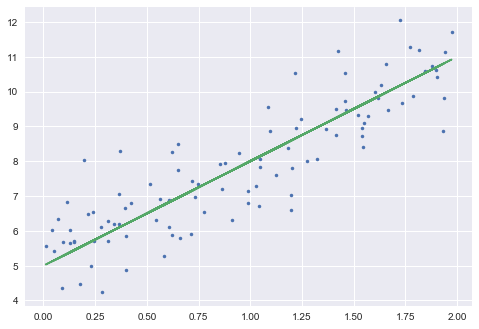

In [10]:
# let's generate some linear looking data to test the equation
# the ideal model apparently is y = 5 + 3x

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

np.random.seed(42) # fix the random seed so that each run generates the same set of random numbers
X = 2 * np.random.rand(100, 1)  # generate 100 random numbers between 0 and 2 with shape (100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)  # generate 100 random numbers from a normal distribution

fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, 5+3*X)

In [11]:
X_bias = np.c_[np.ones((100,)), X] # add bias term coefficient x0 = 1 for each instance

In [12]:
X[:2]

array([[0.74908024],
       [1.90142861]])

In [13]:
# we use np.linalg.inv() to calculate the inverse matrix and np.dot for matrix multiplication
theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [14]:
theta_best

array([[5.21509616],
       [2.77011339]])

We hope $\theta_0 = 5$ and $\theta_1 = 3$ with the random generations we won't get exact that. We got 5.215 and 2.770 instead. So our best model is:

$y = 5.215 + 2.77 * x$

In [15]:
# given a new sets of X_new, we can predict y_pred

X_new = np.array([[0.6], [0.9], [1.3]])
X_new_bias = np.c_[np.ones((3,1)), X_new] # add bias term coefficient x0 = 1 for each instance
y_pred = X_new_bias.dot(theta_best)
y_pred

array([[6.87716419],
       [7.70819821],
       [8.81624356]])

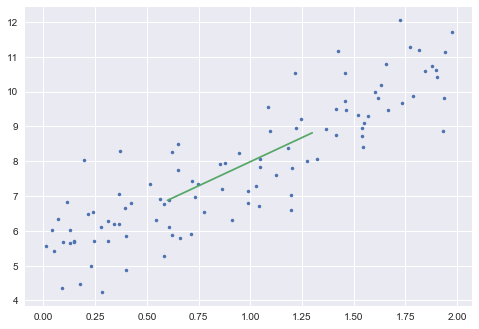

In [16]:
fig, ax = plt.subplots()
ax.plot(X, y, ".")
# ax.plot(X, 5+3*X)
ax.plot(X_new, y_pred)

In [17]:
# Use sklearn to do linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # use the normal equation to train the model
print(lin_reg.intercept_, lin_reg.coef_) # exactly the same as our calculation above!

[5.21509616] [[2.77011339]]


In [18]:
lin_reg.predict(X_new)

array([[6.87716419],
       [7.70819821],
       [8.81624356]])

In [19]:
# use the housing data to try

housing_lin_reg = LinearRegression()
housing_lin_reg.fit(housing_X_train, housing_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# the fitted model is
# median_house_value = -17768 + 2.975 * population + 43399 * median_income + 1828 * housing_median_age
print(housing_lin_reg.intercept_, housing_lin_reg.coef_)

-17768.502521458897 [2.97530968e+00 4.33989999e+04 1.82807894e+03]


In [21]:
housing_X_test[:3]

,population,median_income,housing_median_age
20046,1392.0,1.6812,25.0
3024,1565.0,2.5313,30.0
15663,1310.0,3.4801,52.0


In [22]:
housing_y_test[0:3]

20046     47700.0
3024      45800.0
15663    500001.0
Name: median_house_value, dtype: float64

In [23]:
housing_y_pred = housing_lin_reg.predict(housing_X_test)

In [24]:
housing_y_pred[:3] # the predictions are awful as expected - we did not do any pre-processing

array([105037.50071243, 151586.11382306, 232222.11765249])

In [25]:
# calculate MSE and RMSE
# NOTE: the RMSE is measured on the same scale with the same units as y.
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_y_test, housing_y_pred) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

81323.63578829149

In [26]:
housing_y.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

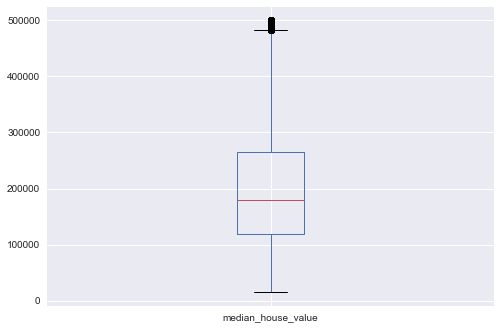

In [27]:
housing_y.plot.box()

The most houses are between \\$120,000  and \\$270,000 and the prediction error is around \\$80,000 - not very good :)

## A few notes

- Do you still need Grid Search to tune linear regression model? why? ... No, we can calculate the optimal/best model using the Normal Equation.
- do you still need to do Cross Validation for linear regression model? ... Most of the time, people don't do that given overfitting is often not an issue for a simple linear model. 
- you still need to build a pipeline to do necessary pre-processing


## OLS Regression
You can do linear regression using `statsmodels` package as follows, which gives you more information (such as R-squared and p-value) from a statistics perspective.

Checkout more at: https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm

In [28]:
# linear regression results using sklearn
print(housing_lin_reg.intercept_, housing_lin_reg.coef_)

-17768.502521458897 [2.97530968e+00 4.33989999e+04 1.82807894e+03]


In [29]:
# if you want to see the p-value, etc. use the following code
# you need to install statsmodels>=0.11.1 in the requirements.txt

# https://www.statsmodels.org/stable/endog_exog.html
# endogenous (endog): caused by factors within the system, which is target/label/dependent variable (DV)
# exogenous (exog): caused by factors outside the system, which is feature/independent variable (IV)

import statsmodels.api as sm
dv = housing_y_train
iv = sm.add_constant(housing_X_train)
ols_reg = sm.OLS(dv, iv)
res = ols_reg.fit()
print(res.summary())

# exactly same results as sklearn

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5809.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:23:33   Log-Likelihood:            -2.0998e+05
No. Observations:               16512   AIC:                         4.200e+05
Df Residuals:                   16508   BIC:                         4.200e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.777e+04   2505

### OLS Result Interpretation
- **p-values** for all three features/IVs above are all 0, which means that all three features are correlated with the target/DV - in other words, they all affect the median housing price. For example, 1828 is the coefficient for housing_median_age, which means housing_median_age increases by 1, the median housing price increase \\$1828 holding other two features constant.
- **[0.025      0.975]** is the 95% confidence interval for your coefficients, which means that you can be 95% confident (pretty sure) that the real value of the coefficient falls somewhere range, e.g., the estimated co-efficient for population is 2.975, and we are 95% sure that the real value for the co-efficient falls between [1.843       4.107]
- **R-squared** is 0.514. The definition of R-squared is as follows ($m$ is number of predictions):


$\large R^2 = 1 - \frac{\sum_{i=1}^m(y-\hat{y})^2}{\sum_{i=1}^m(y-\bar{y})^2}$

where $y$ is the ground truth value of the target, $\hat{y}$ is the predicted value and $\bar{y}$ is the mean of $y$

If our prediction model is perfect, then $\hat{y} = y$ and $R^2 = 1$. If we apply a "naive" prediction to use the mean for all predictions, then $\hat{y} = \bar{y}$ and $R^2 = 0$. So, in terms of prediction accuracy, the higher the $R^2$ the better.

# Polynomial Regression

Polynomial Regression can fit non-linear data to a linear model by adding powers of each feature as new features and then train a linear model on the extended set of features.

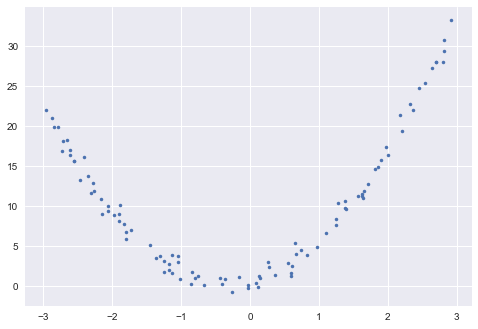

In [30]:
# generate some non-linear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 1 + 2* X + 3 * X**2 + np.random.randn(m, 1)  # the "real" function is y = 1 + 2*x + 3*x^2

fig, ax = plt.subplots()
ax.plot(X, y, ".")

In [31]:
from sklearn.preprocessing import PolynomialFeatures
# a is a column vector representing two features x1, x2
a = np.array([[2, 3, 5], [7, 11, 13] ]).T 
print(a)

# degree=2 added x1*x2, x1^2, x2^2
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
b = poly_features_2.fit_transform(a)
print(b)
# degree=3 added x1*x2, x1^2, x2^2, x1^2*2, x2^2*x1, x1^3, x2^3
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
c = poly_features_3.fit_transform(a)
print(c)

[[ 2  7]
 [ 3 11]
 [ 5 13]]
[[  2.   7.   4.  14.  49.]
 [  3.  11.   9.  33. 121.]
 [  5.  13.  25.  65. 169.]]
[[2.000e+00 7.000e+00 4.000e+00 1.400e+01 4.900e+01 8.000e+00 2.800e+01
  9.800e+01 3.430e+02]
 [3.000e+00 1.100e+01 9.000e+00 3.300e+01 1.210e+02 2.700e+01 9.900e+01
  3.630e+02 1.331e+03]
 [5.000e+00 1.300e+01 2.500e+01 6.500e+01 1.690e+02 1.250e+02 3.250e+02
  8.450e+02 2.197e+03]]


In [32]:
# add polynomial features for X in the plot
X_poly = poly_features_2.fit_transform(X)
print(X_poly[:3])  # X, X^2

[[-0.75275929  0.56664654]
 [ 2.70428584  7.3131619 ]
 [ 1.39196365  1.93756281]]


In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[0.78134581] [[1.93366893 3.06456263]]


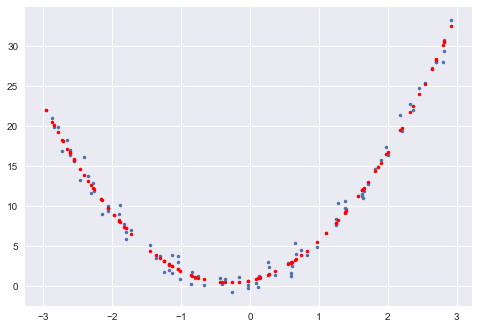

In [34]:
 # the "real" function is y = 1 + 2*x + 3*x^2
# the fitted model: y = 0.781 + 1.934*X + 3.065*X^2 - pretty close
fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, 0.781 + 1.934*X + 3.065*X**2, "r.")

## LaTex Reference
LATEX Math for Undergrads: http://joshua.smcvt.edu/undergradmath/ 

![undergradmath_0](https://user-images.githubusercontent.com/595772/79053791-e5cc1e00-7c0d-11ea-8b10-48e9e3d5288e.png)
![undergradmath_1](https://user-images.githubusercontent.com/595772/79053793-e9f83b80-7c0d-11ea-8d91-d8bb9254981a.png)